## Predict Wine Quality with Regularization
The data we’re working with is from the Wine Quality Dataset in the UCI Machine Learning Repository. We’re looking at the red wine data in particular and while the original dataset has a 1-10 rating for each wine, we’ve made it a classification problem with a wine quality of good (>5 rating) or bad (<=5 rating).

The goals of this project are to:

- implement different logistic regression classifiers
- find the best ridge-regularized classifier using hyperparameter tuning
- implement a tuned lasso-regularized feature selection method

We’re working with:

11 input variables (based on physicochemical tests): ‘fixed acidity’, ‘volatile acidity’, ‘citric acid’, ‘residual sugar’,’chlorides’, ‘free sulfur dioxide’, ‘total sulfur dioxide’, ‘density’, ‘pH’, ‘sulphates’ and ‘alcohol’.
An output variable, ‘quality’ (0 for bad and 1 for good)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


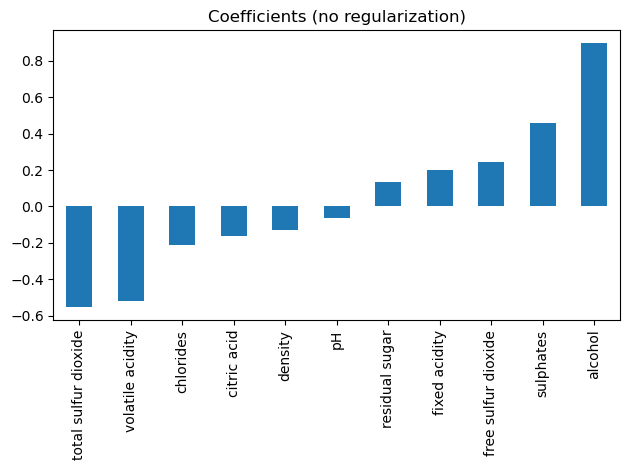

Training Score 0.7727598566308242
Testing Score 0.7266666666666667
Ridge-regularized Training Score 0.7727598566308242
Ridge-regularized Testing Score 0.7266666666666667


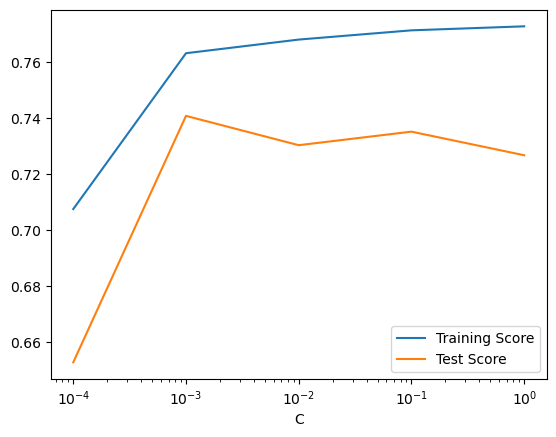

{'C': 0.0019630406500402726} 0.7723336222647887
Test f1-Score with the best classifier: 0.7407407407407408
Best C value [0.25950242]
Best fit coefficients [[ 0.1159753  -0.55608768 -0.17227593  0.03124468 -0.17342209  0.20068725
  -0.50608371  0.         -0.07069262  0.43227632  0.94096355]]


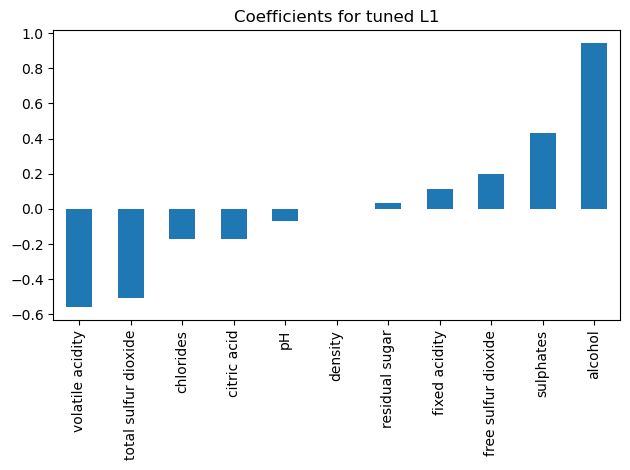

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine_quality.csv')
print(df.columns)
y = df['quality']
features = df.drop(columns = ['quality'])


## 1. Data transformation
from sklearn.preprocessing import StandardScaler
standard_scaler_fit = StandardScaler().fit(features)
X = standard_scaler_fit.transform(features)

## 2. Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

## 3. Fit a logistic regression classifier without regularization
from sklearn.linear_model import LogisticRegression
clf_no_reg = LogisticRegression(penalty=None)
clf_no_reg.fit(x_train, y_train)

## 4. Plot the coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

## 5. Training and test performance You’re now ready to evaluate this classifier!
# In the case of linear regression, we evaluated our models using mean-squared-error. 
# For classifiers, it is important that the classifier not only has high accuracy, 
# but also high precision and recall, i.e., a low false positive and false negative rate. 
# A metric known as f1 score, which is the weighted mean of precision and recall, 
# captures the performance of a classifier holistically. 
# It takes values between 0 and 1 and the closer it is to 1, the better the classifier. 
# Use f1_score() to calculate the f1 score for the training and test data.

from sklearn.metrics import f1_score
y_pred_test = clf_no_reg.predict(x_test)
y_pred_train = clf_no_reg.predict(x_train)
print('Training Score', f1_score(y_train, y_pred_train))
print('Testing Score', f1_score(y_test, y_pred_test))

## 6. Default Implementation (L2-regularized!)
clf_default = LogisticRegression()
clf_default.fit(x_train, y_train)


## 7. Ridge Scores
y_pred_test = clf_default.predict(x_test)
y_pred_train = clf_default.predict(x_train)
print('Ridge-regularized Training Score', f1_score(y_train, y_pred_train))
print('Ridge-regularized Testing Score', f1_score(y_test, y_pred_test))


# The scores remain the same! Our regularization did nothing!
# This means that the constraint boundary for the regularization we performed is large enough
# to hold the original loss function minimum, thus rendering our model the same as the unregularized one.

# How can we tune up the regularization? Parameter C is the inverse of the regularization strength (alpha),
# meaning that smaller values of C correspond to more regularization.
# The scikit-learn default for C is 1; therefore, in order to increase the amount of regularization,
# we need to consider values of C that are less than 1.
# Let’s try a coarse-grained search before performing a fine-grained one.

# We define an array, C_array that takes the values C_array = [0.0001, 0.001, 0.01, 0.1, 1].
# We get an array each for the training and test scores corresponding to these values of C.


## 8. Coarse-grained hyperparameter tuning
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]
for x in C_array:
    clf = LogisticRegression(C = x )
    clf.fit(x_train, y_train)
    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)
    training_array.append(f1_score(y_train, y_pred_train))
    test_array.append(f1_score(y_test, y_pred_test))

## 9. Plot training and test scores as a function of C
plt.plot(C_array,training_array, label = 'Training Score')
plt.plot(C_array,test_array, label = 'Test Score')
plt.xscale('log')
plt.xlabel('C')
plt.legend()
plt.show()
plt.clf()

## 10. Making a parameter grid for GridSearchCV
C_array  = np.logspace(-4, -2, 100)
#Making a dict to enter as an input to param_grid
tuning_C = {'C':C_array}

## 11. Implementing GridSearchCV with l2 penalty.
from sklearn.model_selection import GridSearchCV
clf_gs = LogisticRegression()
gs = GridSearchCV(clf_gs, param_grid = tuning_C, scoring = 'f1', cv = 5)
gs.fit(x_train,y_train)

## 12. Optimal C value and the score corresponding to it
print(gs.best_params_, gs.best_score_)

## 13. Validating the "best classifier"
clf_best = LogisticRegression(C = gs.best_params_['C'])
clf_best.fit(x_train,y_train)
y_pred_best = clf_best.predict(x_test)
print("Test f1-Score with the best classifier:", f1_score(y_test,y_pred_best))

## 14. Implement L1 hyperparameter tuning with LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
C_array = np.logspace(-2,2,100)
clf_l1 = LogisticRegressionCV(Cs=C_array, cv = 5, penalty = 'l1', scoring = 'f1', solver = 'liblinear')
clf_l1.fit(X,y)

## 15. Optimal C value and corresponding coefficients
print('Best C value', clf_l1.C_)
print('Best fit coefficients', clf_l1.coef_)



## 16. Plotting the tuned L1 coefficients
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()